In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from collections import Counter

In [2]:
data = pd.read_csv("F:\\download\\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
## above data there is no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


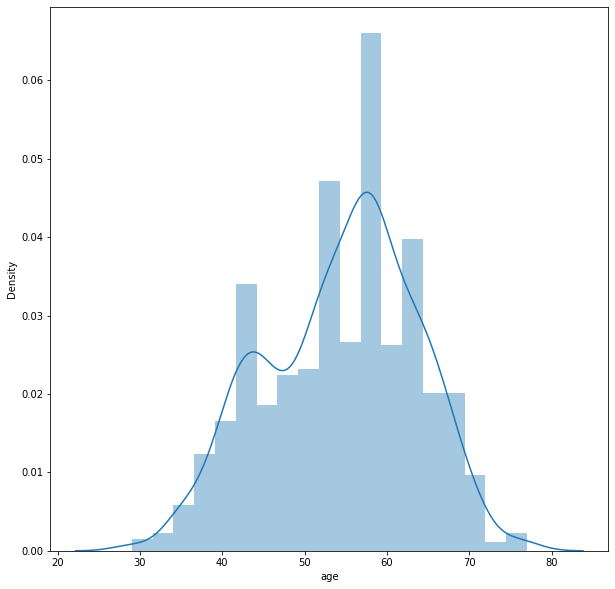

In [6]:
plt.figure(figsize=(10,10))
sns.distplot(data['age'])
plt.show()


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

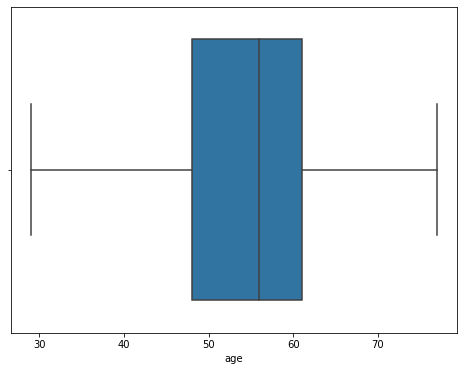

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data["age"])

C:\Python310\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x000001889F601F90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


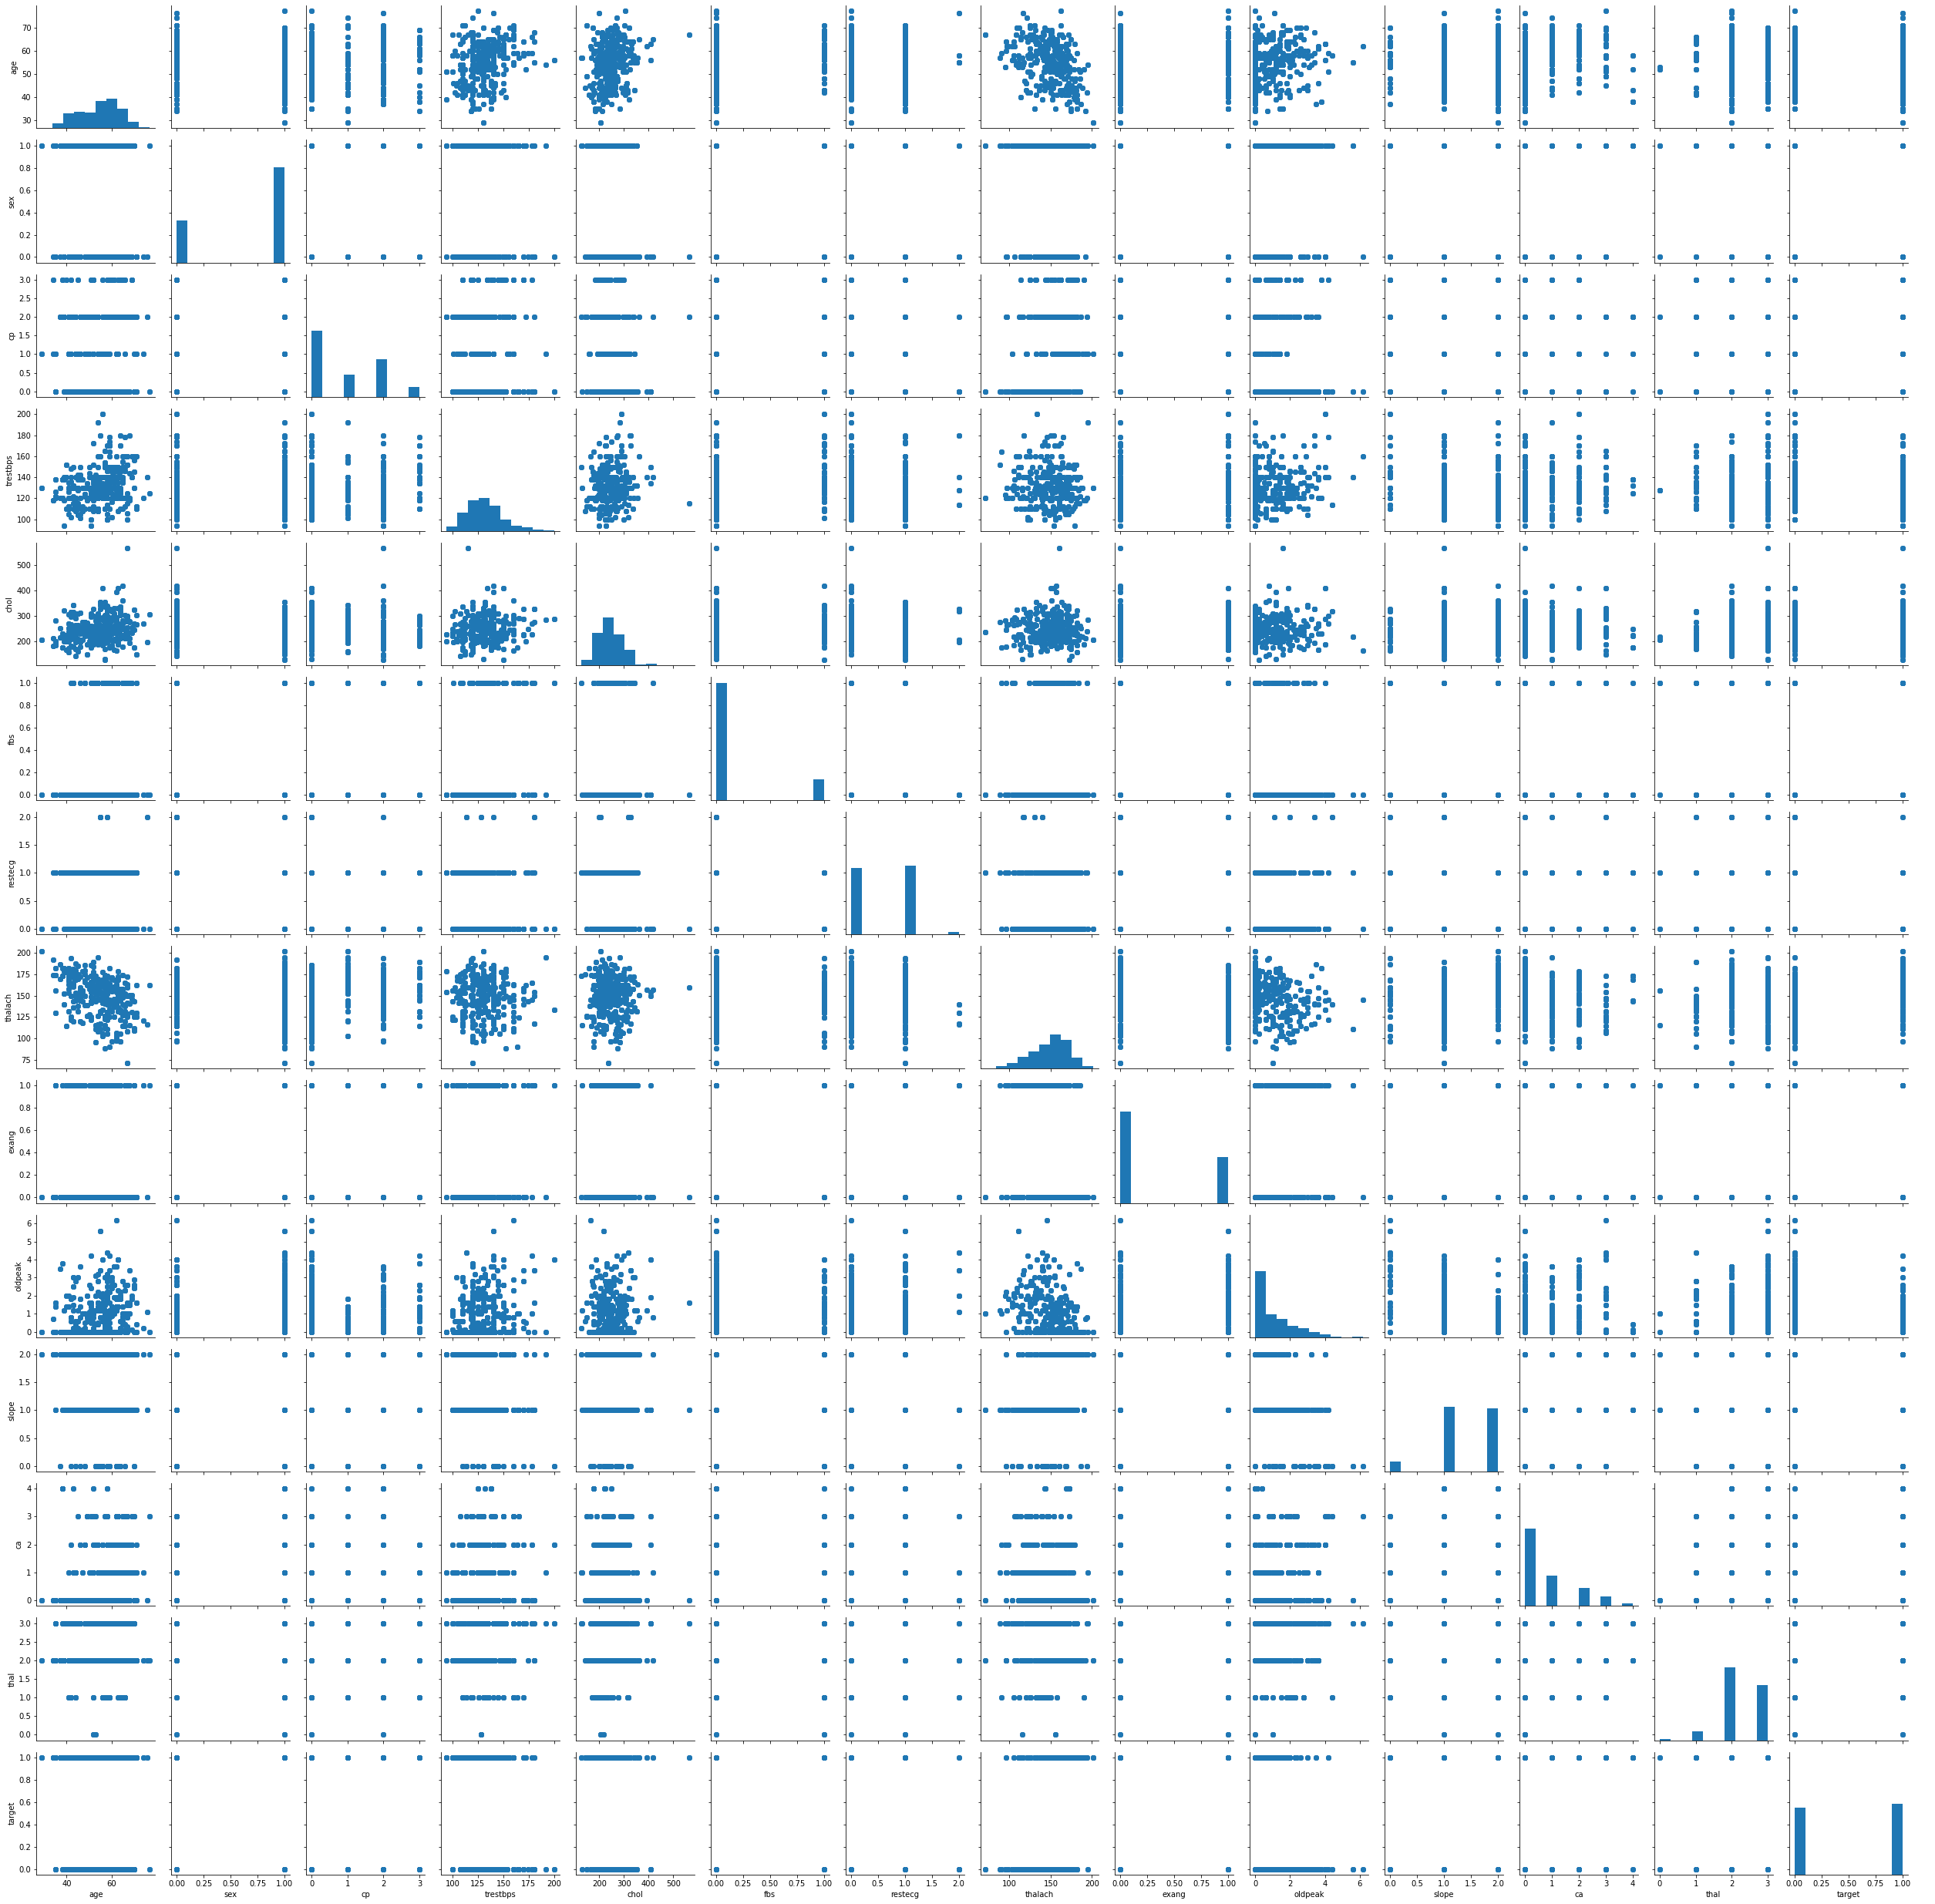

In [8]:
g = sns.PairGrid(data)
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist)
g = g.add_legend()
plt.show()

# model preparation

In [9]:
y = data['target']
x = data.drop('target',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20,random_state=0)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [10]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [11]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


# feature scaling

In [12]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [14]:
from mlxtend.classifier import StackingCVClassifier

In [15]:
## logistic regression
m1 = 'LogisticRegression'
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
print('confussion matrix')
print(lr_conf_matrix)
print("\n")
print("Accuracy of logistic regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of logistic regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [16]:
## naive bayes
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(x_train,y_train)
nbpred=nb.predict(x_test)
nb_conf_matrix =confusion_matrix(y_test,nbpred)
nb_acc_score = accuracy_score(y_test,nbpred)
print('confussion matrix')
print(nb_conf_matrix)
print("\n")
print('accuracy of naive bayes model:',nb_acc_score*100,"\n")
print(classification_report(y_test,nbpred))

confussion matrix
[[79 19]
 [11 96]]


accuracy of naive bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [17]:
## random forest

m3 = "Random Forest Classifier"
rf = RandomForestClassifier(n_estimators =20,random_state = 12,max_depth =5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predicted)
rf_acc_score = accuracy_score(y_test,rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy of random forest:",rf_acc_score*100,"\n")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 88  10]
 [  3 104]]


accuracy of random forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



In [18]:
## extreme gradiant boost
m4 = "Extreme Gradiant Boost"
xgb = XGBClassifier(learning_rate = 0.01, n_estimators =25,max_depth =15,gamma=0.6,subsample =0.52,colsample_bytree =0.6,seed=27,reg_lambda=2,booster='dart',colsample_bylevel=0.6,colsample_bynode=0.5)
xgb.fit(x_train,y_train)
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test,xgb_predicted)
xgb_acc_score= accuracy_score(y_test,xgb_predicted)
print('confusion matrix')
print(xgb_conf_matrix)
print("\n")
print("Accuracy of extreme gradant boost:",xgb_acc_score*100,"\n")
print(classification_report(y_test,xgb_predicted))

confusion matrix
[[ 89   9]
 [  2 105]]


Accuracy of extreme gradant boost: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [19]:
## K-Neighborsclassifier
m5 = "K-NeighborsClassifier"
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test,knn_predicted)
knn_acc_score = accuracy_score(y_test,knn_predicted)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("accuracy of K-NeighborsClassifier:",knn_acc_score*100,"\n")
print(classification_report(y_test,knn_predicted))

confusion matrix
[[84 14]
 [11 96]]


accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [23]:
## DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(x_train,y_train)
dt_predicted = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test,dt_predicted)
dt_acc_score = accuracy_score(y_test,dt_predicted)
print('confusion matrix')
print(dt_conf_matrix)
print("\n")
print("accuracy of the DecisionTreeClassifier:",dt_acc_score*100,"\n")
print(classification_report(y_test,dt_predicted))

confusion matrix
[[95  3]
 [ 8 99]]


accuracy of the DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [26]:
## suport vector machine
svc = SVC(kernel = 'rbf',C=2)
svc.fit(x_train,y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix= confusion_matrix(y_test,svc_predicted)
svc_acc_score = accuracy_score(y_test,svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("accuracy of the  support vector classification:",svc_acc_score*100,"\n")
print(classification_report(y_test,svc_predicted))

confusion matrix
[[ 94   4]
 [  0 107]]


accuracy of the  support vector classification: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



# model evaluation

In [53]:
model_ev = pd.DataFrame({
    'Model':['Logistic Regression','naive Bayes','Random Forest','Extreme Gradient Boost',
                                  'K-Nearest Neighbour','Decision Tree','Support Vector Machine'],
    'Accuracy':[lr_acc_score,nb_acc_score,rf_acc_score,xgb_acc_score,knn_acc_score,dt_acc_score,svc_acc_score]})

model_new= model_ev.sort_values(by='Accuracy',ascending=False)
model_new = model_new.set_index('Accuracy')
model_new.head(7)

,Model
Accuracy,
0.980488,Support Vector Machine
0.946341,Extreme Gradient Boost
0.946341,Decision Tree
0.936585,Random Forest
0.878049,K-Nearest Neighbour
0.863415,Logistic Regression
0.853659,naive Bayes


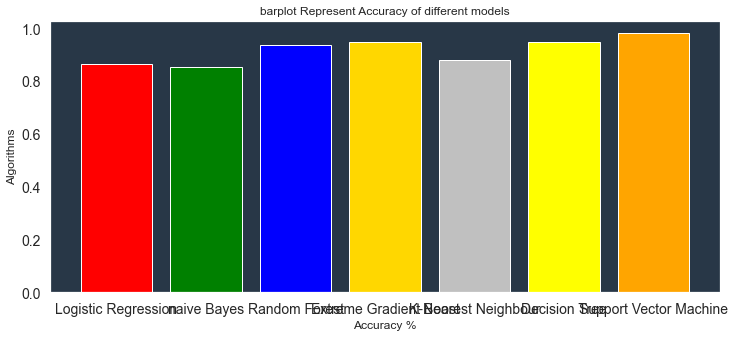

In [55]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## ensembling
in oredr to increse the accuracy of thr model we use ensembling .here we use "stacking technique"

In [57]:
scv=StackingCVClassifier(classifiers=[xgb,rf,svc],meta_classifier= svc,random_state=42)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[ 91   7]
 [  2 105]]


Accuracy of StackingCVClassifier: 95.60975609756098 

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        98
           1       0.94      0.98      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205

